# در این پروژه هدف طراحی یک سیستم فازی است

**نیاز به نصب کتابخانه زیر است Kaggle برای دانلود مستقیم دیتاست مورد نظر از**

In [1]:
! pip install opendatasets

**برای دانلود مستقیم نیاز به ساخت اکانت در کگل است**

In [2]:
import opendatasets

opendatasets.download('https://www.kaggle.com/datasets/mehradaria/leukemia/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afatemed
Your Kaggle Key: ··········


100%|██████████| 110M/110M [00:00<00:00, 160MB/s]


# پیش پردازش

**فراخوانی کتابخانه های موردنظر**

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from fastai.vision.all import *
from fastai.vision import models

**پردازش در تمامی فایل های موجود و تغییر اندازه به 256 پیکسل**

In [4]:
dataset_dir = '/content/leukemia/Original'

preprocessed_dir = '/content/leukemia/Original'

if not os.path.exists(preprocessed_dir):
    os.makedirs(preprocessed_dir)

def preprocess_image(image_path, output_path, target_size):
    try:
        img = Image.open(image_path)
        img = img.resize(target_size)
        img.save(output_path)
    except Exception as e:
        print(f"Failed to preprocess image {image_path}: {e}")

for root, _, files in os.walk(dataset_dir):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            output_path = os.path.join(preprocessed_dir, file)
            preprocess_image(image_path, output_path, target_size=(256, 256))

print("Image pre-processing completed!")

Image pre-processing completed!


 **بازیابی مسیرهای فایل و برچسب‌های مربوط به آن‌ها وایجاد یک دیتافریم برای ذخیره  اطلاعات برای پردازش بیشت**ر

In [5]:
data_dir = preprocessed_dir
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    if os.path.isdir(foldpath):  # شرط بررسی اینکه مسیر یک پوشه باشد
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
    else:
        print(f"The path {foldpath} is not a directory!")


Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis=1)

The path /content/leukemia/Original/WBC-Malignant-Early-531.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Pre-531.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Pro-437.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Pro-307.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Pre-823.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Early-589.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Early-395.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Early-318.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Early-240.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Early-438.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Early-784.jpg is not a directory!
The path /content/leukemia/Original/WBC-Malignant-Pro-773.jpg is not a directory!
Th

In [6]:
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [7]:
df

,filepaths,labels
0,/content/leukemia/Original/Pre/WBC-Malignant-Pre-531.jpg,Pre
1,/content/leukemia/Original/Pre/WBC-Malignant-Pre-823.jpg,Pre
2,/content/leukemia/Original/Pre/WBC-Malignant-Pre-706.jpg,Pre
3,/content/leukemia/Original/Pre/WBC-Malignant-Pre-172.jpg,Pre
4,/content/leukemia/Original/Pre/WBC-Malignant-Pre-146.jpg,Pre
...,...,...
3251,/content/leukemia/Original/Early/WBC-Malignant-Early-699.jpg,Early
3252,/content/leukemia/Original/Early/WBC-Malignant-Early-861.jpg,Early
3253,/content/leukemia/Original/Early/WBC-Malignant-Early-158.jpg,Early
3254,/content/leukemia/Original/Early/WBC-Malignant-Early-549.jpg,Early


**انتخاب تصادفی تصاویر را برای هر کلاس منحصر به فرد و نمایش  نام کلاس در زیر هر تصویر**

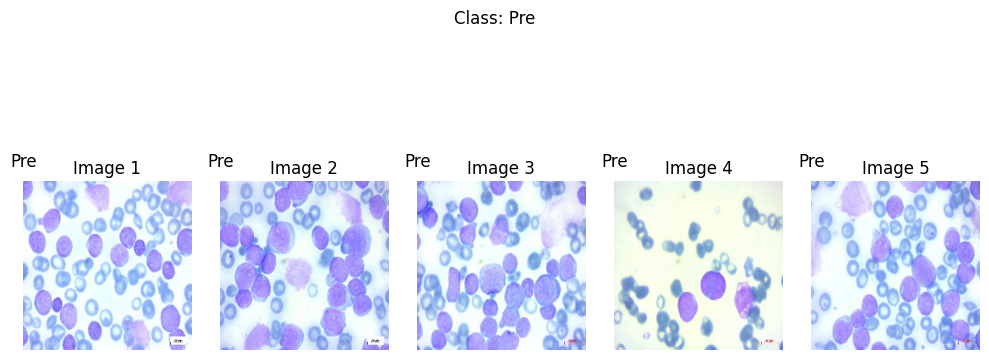

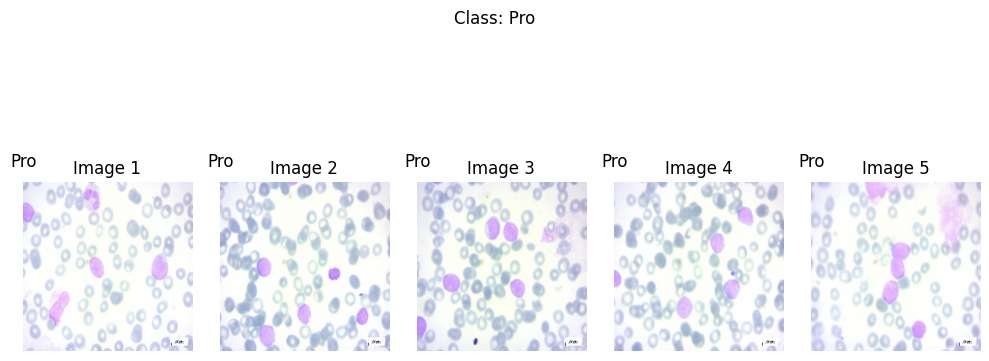

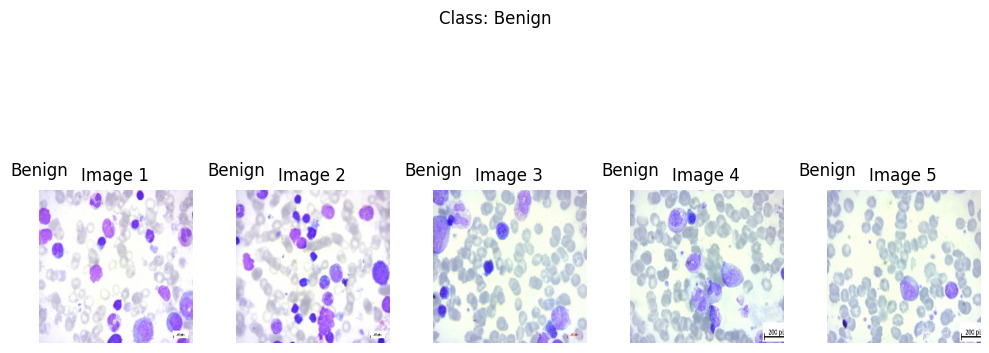

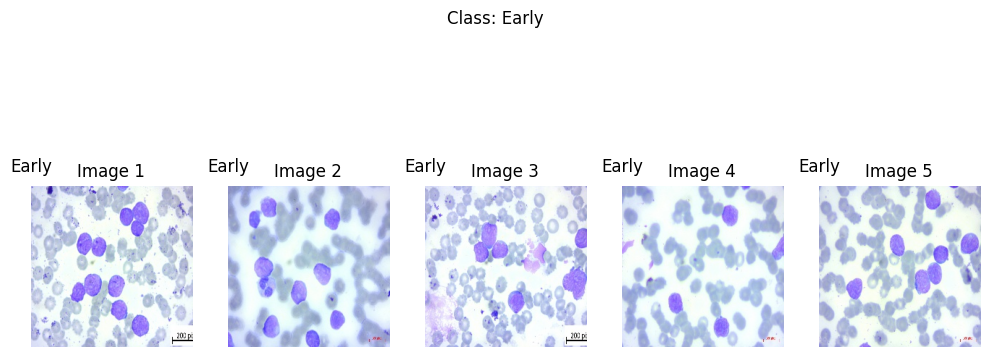

In [8]:
num_images_to_display = 5
classes = df['labels'].unique()

for class_name in classes:
    class_images = df[df['labels'] == class_name]['filepaths'].sample(num_images_to_display)
    plt.figure(figsize=(10, 5))
    for i, image_path in enumerate(class_images):
        img = plt.imread(image_path)
        ax = plt.subplot(1, num_images_to_display, i+1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Image {i+1}")
        ax.text(0, -20, class_name, fontsize=12, ha='center')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
    plt.suptitle(f"Class: {class_name}")
    plt.tight_layout()
    plt.show()

ن**مایش تعداد کلاس های موجود و تعداد تصاویر موجود در هرکلاس**

In [9]:
class_counts = df['labels'].value_counts()
print("Number of images in each class:")
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Number of images in each class:
Class: Early, Count: 985
Class: Pre, Count: 963
Class: Pro, Count: 804
Class: Benign, Count: 504


# استخراج ویژگی

 و**سپس استخراج ویژگی extract_color_features و extract_texture_features  تعریف دو تاب**ع



 ت**ابعی که هیستوگرام رنگی تصویر را به عنوان یک ویژگی انتخاب میکند Extract_color_features**

**تابعی که ویژگی های بافت استخراج شده با استفاده از ماتریس سطح خاکستری برمیگرداند  Extract_texture_features **

In [ ]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="skimage")

def extract_color_features(image):
    image_array = np.array(image)
    hist, _ = np.histogram(image_array.flatten(), bins=256, range=[0, 256])

    return hist

def extract_texture_features(image):
    gray_image = rgb2gray(image)
    gray_image_uint = img_as_ubyte(gray_image)

    distances = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = greycomatrix(gray_image_uint, distances, angles, symmetric=True, normed=True)

    contrast = greycoprops(glcm, 'contrast').flatten()
    dissimilarity = greycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = greycoprops(glcm, 'homogeneity').flatten()
    energy = greycoprops(glcm, 'energy').flatten()
    correlation = greycoprops(glcm, 'correlation').flatten()

    texture_features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation))

    return texture_features

color_features = []
texture_features = []

for file_path in df['filepaths']:
    image = Image.open(file_path)
    image_rgb = image.convert('RGB')

    color_hist = extract_color_features(image_rgb)
    color_features.append(color_hist)

    texture_feat = extract_texture_features(image_rgb)
    texture_features.append(texture_feat)

# Now you have 'color_features' and 'texture_features' as your extracted features to be used in your fuzzy systems.

**ایجاد یک دیتافریم که ترکیبی از هر دو ویژگی استخراج شده است**

In [11]:
import pandas as pd

color_data = pd.DataFrame(color_features, columns=[f'color_{i}' for i in range(len(color_features[0]))])

texture_data = pd.DataFrame(texture_features, columns=[f'texture_{i}' for i in range(len(texture_features[0]))])

combined_data = pd.concat([color_data, texture_data], axis=1)

In [12]:
combined_data

,color_0,color_1,color_2,color_3,color_4,color_5,color_6,color_7,color_8,color_9,...,texture_10,texture_11,texture_12,texture_13,texture_14,texture_15,texture_16,texture_17,texture_18,texture_19
0,0,0,0,0,0,0,0,0,0,0,...,0.305466,0.241699,0.042697,0.040359,0.045311,0.040133,0.944791,0.921684,0.965024,0.922461
1,0,0,0,0,0,0,0,0,0,0,...,0.269023,0.206003,0.035229,0.032728,0.037952,0.033025,0.958596,0.934789,0.974179,0.940616
2,0,0,0,0,0,0,0,0,0,0,...,0.282491,0.226075,0.045632,0.042204,0.047723,0.042566,0.944616,0.920341,0.964398,0.920996
3,0,0,0,0,0,0,0,0,0,0,...,0.304793,0.241211,0.047755,0.044631,0.050406,0.044858,0.952926,0.933405,0.969772,0.931931
4,0,0,0,0,0,0,0,0,0,0,...,0.289282,0.221466,0.041278,0.038187,0.043688,0.037925,0.962546,0.942487,0.971082,0.940537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,0,0,0,0,0,0,0,0,0,0,...,0.328376,0.268105,0.072162,0.067976,0.075262,0.067735,0.953439,0.934136,0.970106,0.929926
3252,0,0,0,0,0,0,0,0,0,0,...,0.385199,0.297205,0.070523,0.066135,0.075006,0.065115,0.977582,0.968245,0.986464,0.965792
3253,0,0,0,0,0,0,0,0,0,0,...,0.385747,0.302618,0.067843,0.063247,0.071409,0.063151,0.968078,0.957114,0.982158,0.952384
3254,157,41,35,16,20,5,9,3,4,3,...,0.325775,0.273038,0.073965,0.070069,0.076030,0.070111,0.874676,0.811473,0.896797,0.813378


# طراحی سیسیتم

**نصب کتابخانه مورد نظر**

In [13]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=f1211136634ac65e5d66be4de319492f426f259dfb413ebb44543617db9ede84
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


**ایجاد توابع عضویت برای متغیرهای خروجی و ورودی و تعیین بازه هر متغیر و رسم توابع عضویت مربوط به هر متغیر**

In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

color_patterns = ctrl.Antecedent(np.arange(0,256,1), 'color_patterns')
texture_patterns = ctrl.Antecedent(np.arange(0,100,1), 'texture_patterns')


output_patterns = ctrl.Antecedent(np.arange(0,2,1), 'output_patterns')

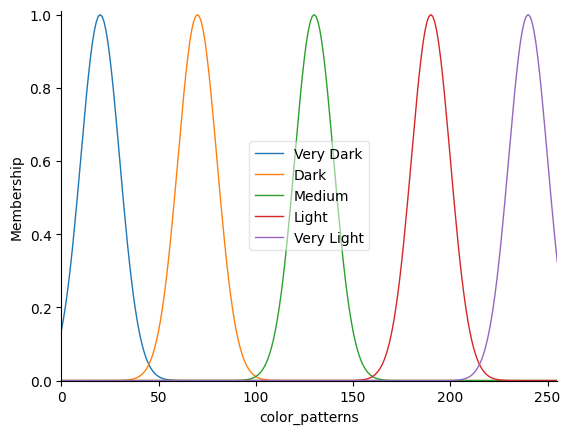

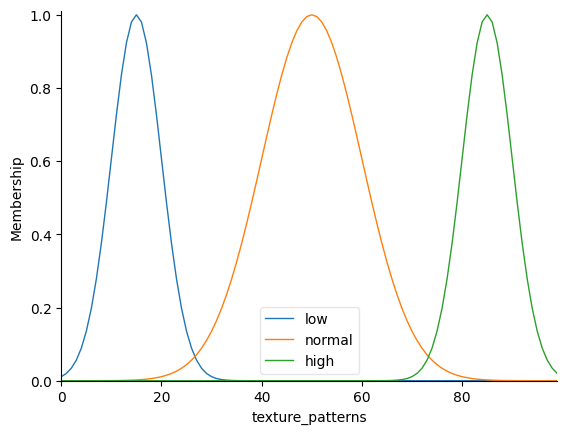

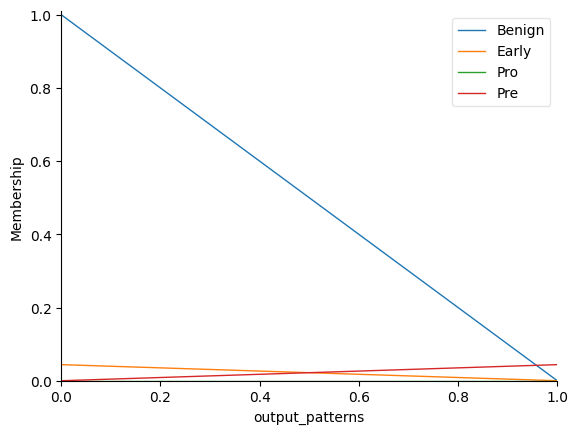

In [15]:
color_patterns ['Very Dark'] = fuzz.gaussmf(color_patterns.universe,20,10)
color_patterns ['Dark'] = fuzz.gaussmf(color_patterns.universe,70,10)
color_patterns ['Medium'] = fuzz.gaussmf(color_patterns.universe,130,10)
color_patterns ['Light'] = fuzz.gaussmf(color_patterns.universe,190,10)
color_patterns ['Very Light'] = fuzz.gaussmf(color_patterns.universe,240,10)
color_patterns.view()

texture_patterns ['low'] = fuzz.gaussmf(texture_patterns.universe,15,5)
texture_patterns ['normal'] = fuzz.gaussmf(texture_patterns.universe,50,10)
texture_patterns ['high'] = fuzz.gaussmf(texture_patterns.universe,85,5)
texture_patterns.view()


output_patterns['Benign'] = fuzz.gaussmf(output_patterns.universe, 0, 0.1)
output_patterns['Early'] = fuzz.gaussmf(output_patterns.universe, 0.25, 0.1)
output_patterns['Pro'] = fuzz.gaussmf(output_patterns.universe, 0.5, 0.1)
output_patterns['Pre'] = fuzz.gaussmf(output_patterns.universe, 0.75, 0.1)
output_patterns.view()

**تعیین فوانین اگر-آنگاه فازی**

In [16]:
rule1= ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['low']  , output_patterns['Pre'])
rule2= ctrl.Rule(color_patterns['Dark'] & texture_patterns['normal']  , output_patterns['Early'])
rule3= ctrl.Rule(color_patterns['Medium'] & texture_patterns['normal']  , output_patterns['Pro'])
rule4= ctrl.Rule(color_patterns['Light'] & texture_patterns['normal'] , output_patterns['Pre'])
rule5= ctrl.Rule(color_patterns['Very Light'] & texture_patterns['normal']  , output_patterns['Benign'])
rule6= ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['high']  , output_patterns['Pro'])
rule7= ctrl.Rule(color_patterns['Dark'] & texture_patterns['high']  , output_patterns['Pro'])
rule8= ctrl.Rule(color_patterns['Medium'] & texture_patterns['high']  , output_patterns['Pre'])
rule9= ctrl.Rule(color_patterns['Light'] & texture_patterns['high'] , output_patterns['Pre'])
rule10= ctrl.Rule(color_patterns['Very Light'] & texture_patterns['high'] , output_patterns['Benign'])
rule11= ctrl.Rule(color_patterns['Medium'] & texture_patterns['low'] , output_patterns['Pro'])
rule12= ctrl.Rule(color_patterns['Light'] & texture_patterns['low'] , output_patterns['Pro'])
rule13= ctrl.Rule(color_patterns['Very Light'] & texture_patterns['low'] , output_patterns['Benign'])

# طراحی سیستم استنتاج فازی ممدانی

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


color_patterns = ctrl.Antecedent(np.arange(0, 256, 1), 'color_patterns')
texture_patterns = ctrl.Antecedent(np.arange(0, 100, 1), 'texture_patterns')
output_patterns = ctrl.Consequent(np.arange(0, 2, 1), 'output_patterns')

color_patterns['Very Dark'] = fuzz.gaussmf(color_patterns.universe, 20, 10)
color_patterns['Dark'] = fuzz.gaussmf(color_patterns.universe, 70, 10)
color_patterns['Medium'] = fuzz.gaussmf(color_patterns.universe, 130, 10)
color_patterns['Light'] = fuzz.gaussmf(color_patterns.universe, 190, 10)
color_patterns['Very Light'] = fuzz.gaussmf(color_patterns.universe, 240, 10)

texture_patterns['low'] = fuzz.gaussmf(texture_patterns.universe, 15, 5)
texture_patterns['normal'] = fuzz.gaussmf(texture_patterns.universe, 50, 10)
texture_patterns['high'] = fuzz.gaussmf(texture_patterns.universe, 85, 5)

output_patterns['Benign'] = fuzz.gaussmf(output_patterns.universe, 0, 0.1)
output_patterns['Early'] = fuzz.gaussmf(output_patterns.universe, 0.25, 0.1)
output_patterns['Pro'] = fuzz.gaussmf(output_patterns.universe, 0.5, 0.1)
output_patterns['Pre'] = fuzz.gaussmf(output_patterns.universe, 0.75, 0.1)


rules = [
    ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['low'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Dark'] & texture_patterns['normal'], output_patterns['Early']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['normal'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['normal'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['normal'], output_patterns['Benign']),
    ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['high'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Dark'] & texture_patterns['high'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['high'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['high'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['high'], output_patterns['Benign']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['low'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['low'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['low'], output_patterns['Benign'])
]


mamdani_ctrl = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(mamdani_ctrl)


sim.input['color_patterns'] = 200
sim.input['texture_patterns'] = 80

sim.compute()

output = sim.output['output_patterns']
print(output)


0.6641409134414503


**نمایش گرافیکی سیستم استنتاج فازی ممدانی**

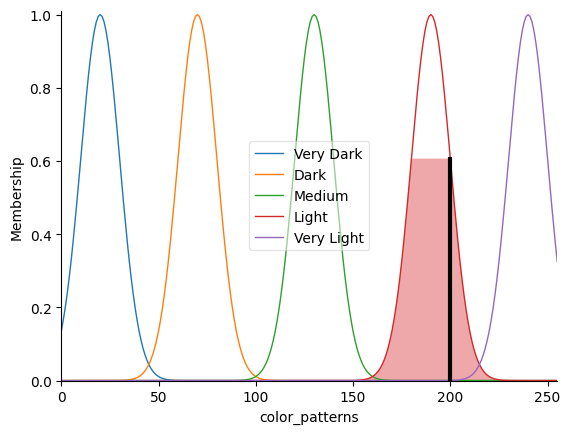

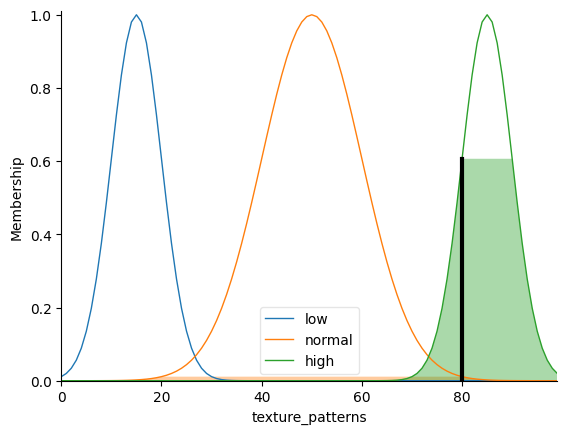

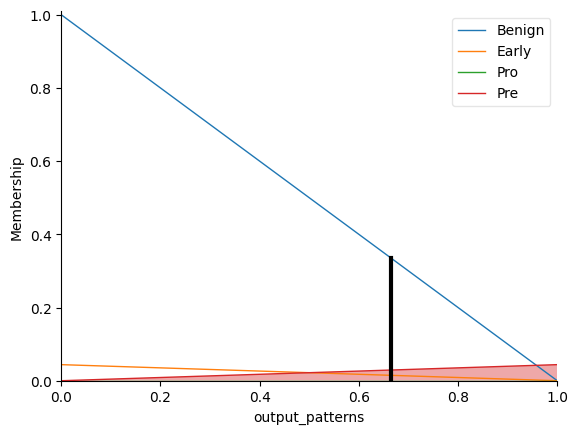

In [18]:
color_patterns.view(sim)
texture_patterns.view(sim)
output_patterns.view(sim)

plt.show()

# MAE خطای

**Mean Absolute Error**

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


color_patterns = ctrl.Antecedent(np.arange(0, 256, 1), 'color_patterns')
texture_patterns = ctrl.Antecedent(np.arange(0, 100, 1), 'texture_patterns')
output_patterns = ctrl.Consequent(np.arange(0, 2, 1), 'output_patterns')

color_patterns['Very Dark'] = fuzz.gaussmf(color_patterns.universe, 20, 10)
color_patterns['Dark'] = fuzz.gaussmf(color_patterns.universe, 70, 10)
color_patterns['Medium'] = fuzz.gaussmf(color_patterns.universe, 130, 10)
color_patterns['Light'] = fuzz.gaussmf(color_patterns.universe, 190, 10)
color_patterns['Very Light'] = fuzz.gaussmf(color_patterns.universe, 240, 10)

texture_patterns['low'] = fuzz.gaussmf(texture_patterns.universe, 15, 5)
texture_patterns['normal'] = fuzz.gaussmf(texture_patterns.universe, 50, 10)
texture_patterns['high'] = fuzz.gaussmf(texture_patterns.universe, 85, 5)

output_patterns['Benign'] = fuzz.gaussmf(output_patterns.universe, 0, 0.1)
output_patterns['Early'] = fuzz.gaussmf(output_patterns.universe, 0.25, 0.1)
output_patterns['Pro'] = fuzz.gaussmf(output_patterns.universe, 0.5, 0.1)
output_patterns['Pre'] = fuzz.gaussmf(output_patterns.universe, 0.75, 0.1)


rules = [
    ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['low'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Dark'] & texture_patterns['normal'], output_patterns['Early']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['normal'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['normal'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['normal'], output_patterns['Benign']),
    ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['high'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Dark'] & texture_patterns['high'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['high'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['high'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['high'], output_patterns['Benign']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['low'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['low'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['low'], output_patterns['Benign'])
]


mamdani_ctrl = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(mamdani_ctrl)


sim.input['color_patterns'] = 200
sim.input['texture_patterns'] = 80

sim.compute()

output = sim.output['output_patterns']
print(output)


actual_output = 0.75  # class = Pre

# محاسبه خطای MAE
mae = abs(output - actual_output)
print("MAE:", mae)

0.6641409134414503
MAE: 0.08585908655854968


# RMSE خطای

**Root Mean Square Error**

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


color_patterns = ctrl.Antecedent(np.arange(0, 256, 1), 'color_patterns')
texture_patterns = ctrl.Antecedent(np.arange(0, 100, 1), 'texture_patterns')
output_patterns = ctrl.Consequent(np.arange(0, 2, 1), 'output_patterns')

color_patterns['Very Dark'] = fuzz.gaussmf(color_patterns.universe, 20, 10)
color_patterns['Dark'] = fuzz.gaussmf(color_patterns.universe, 70, 10)
color_patterns['Medium'] = fuzz.gaussmf(color_patterns.universe, 130, 10)
color_patterns['Light'] = fuzz.gaussmf(color_patterns.universe, 190, 10)
color_patterns['Very Light'] = fuzz.gaussmf(color_patterns.universe, 240, 10)

texture_patterns['low'] = fuzz.gaussmf(texture_patterns.universe, 15, 5)
texture_patterns['normal'] = fuzz.gaussmf(texture_patterns.universe, 50, 10)
texture_patterns['high'] = fuzz.gaussmf(texture_patterns.universe, 85, 5)

output_patterns['Benign'] = fuzz.gaussmf(output_patterns.universe, 0, 0.1)
output_patterns['Early'] = fuzz.gaussmf(output_patterns.universe, 0.25, 0.1)
output_patterns['Pro'] = fuzz.gaussmf(output_patterns.universe, 0.5, 0.1)
output_patterns['Pre'] = fuzz.gaussmf(output_patterns.universe, 0.75, 0.1)


rules = [
    ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['low'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Dark'] & texture_patterns['normal'], output_patterns['Early']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['normal'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['normal'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['normal'], output_patterns['Benign']),
    ctrl.Rule(color_patterns['Very Dark'] & texture_patterns['high'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Dark'] & texture_patterns['high'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['high'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['high'], output_patterns['Pre']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['high'], output_patterns['Benign']),
    ctrl.Rule(color_patterns['Medium'] & texture_patterns['low'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Light'] & texture_patterns['low'], output_patterns['Pro']),
    ctrl.Rule(color_patterns['Very Light'] & texture_patterns['low'], output_patterns['Benign'])
]


mamdani_ctrl = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(mamdani_ctrl)

input_data = {
    'color_patterns': [100, 150, 50, 200],
    'texture_patterns': [30, 70, 80, 40]
}

expected_output = [0.5, 0.5, 0.1, 0.5]
predicted_output = []

for i in range(len(input_data['color_patterns'])):
    sim.input['color_patterns'] = input_data['color_patterns'][i]
    sim.input['texture_patterns'] = input_data['texture_patterns'][i]
    sim.compute()
    predicted_output.append(sim.output['output_patterns'])

print('predicted output:',predicted_output)
rmse = np.sqrt(np.mean(np.square(np.subtract(expected_output, predicted_output))))
print('RMSE:', rmse)

predicted output: [0.4398623336711376, 0.5601376663288624, 0.4398623336711376, 0.6641409134414503]
RMSE: 0.19344361138116486
